In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,roc_curve, auc
import pandas as pd 


In [129]:
'''
  Get k nearest neighbours for minority samples
'''

def get_knn(X, y, y_minority, k):
  neighbours = []
  for index_1 in range(len(X[:][y==y_minority])):
    neighbours.append([])
    for index_2 in range(len(X[:][y==y_minority])):
      if index_2 != index_1:
        dist = np.sum(np.square(X[:][y==y_minority][index_1]-X[:][y==y_minority][index_2]))
        neighbours[index_1].append((dist, index_2))
    neighbours[index_1].sort()
  neighbours = np.array(neighbours)
  k_neighbours = neighbours[:, :k]
  return k_neighbours

In [132]:
'''
  NN vector selection for oversampling
'''

def nn_vect_select(X, y, y_minority, nnarray, k, os_percent):
  init_size = len(X[:][y==y_minority])
  factor = os_percent // 100
  for index_1 in range(init_size):
    neigh_nums = random.sample(range(0, k), factor)
    for i in neigh_nums:
      index_2 = int(nnarray[index_1][i][1])
      # new_vals = []
      # for fid in range(len(X[:][y==y_minority][index_1])):
      #   ratio = random.random()
      #   new_vals.append(X[:][y==y_minority][index_1][fid] + ratio * (X[:][y==y_minority][index_2][fid] - X[:][y==y_minority][index_1][fid]))
      ratio = random.random()
      new_vals = X[:][y==y_minority][index_1] + ratio * (X[:][y==y_minority][index_2] - X[:][y==y_minority][index_1])
      X = np.append(X,[new_vals],axis=0)
      y = np.append(y,[y_minority])
  return X, y

In [ ]:
''' 
  Load data
'''

def loadData():
  df = pd.read_csv('./sample_data/diabetes.csv')
  X = df.drop(df.columns.values[-1:],axis=1)
  y = df.drop(df.columns.values[:-1],axis=1)
  y_minority = 1
  
  return X.to_numpy(),y.to_numpy(), y_minority

True  + :  29
True  - :  87
False + :  20
False - : 18
Precision :  0.5918367346938775
Recall :  0.6170212765957447


Oversampling:  200%
k value :  5
True  + :  151
True  - :  60
False + :  44
False - : 6
Precision :  0.7743589743589744
Recall :  0.9617834394904459


Oversampling:  300%
k value :  5
True  + :  212
True  - :  41
False + :  56
False - : 6
Precision :  0.7910447761194029
Recall :  0.9724770642201835


Oversampling:  400%
k value :  5
True  + :  250
True  - :  51
False + :  64
False - : 3
Precision :  0.7961783439490446
Recall :  0.9881422924901185


Oversampling:  500%
k value :  5
True  + :  310
True  - :  47
False + :  64
False - : 1
Precision :  0.8288770053475936
Recall :  0.9967845659163987




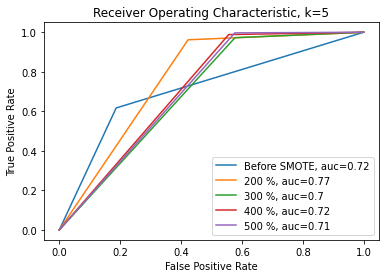

In [133]:
oversampling_percentage = [200, 300, 400, 500]
k_values = [5]

X,y, y_minority = loadData()

for k in k_values:
  y = y.ravel()
  old_X = X
  old_y = y
  X_train,X_test,y_train,y_test = train_test_split(old_X,old_y,test_size=0.2,random_state=0)

  model_old = KNeighborsClassifier()
  model_old.fit(X_train,y_train)
  y_predict = model_old.predict(X_test)
  tp = 0
  tn = 0
  fp = 0
  fn = 0

  for i in range(len(y_test)):
    if y_test[i] != y_minority and y_predict[i] != y_minority:
      tn += 1
      y_test[i] = 0
      y_predict[i] = 0
    elif y_test[i] != y_minority and y_predict[i] == y_minority:
      fp += 1
      y_test[i] = 0
      y_predict[i] = 1
    elif y_test[i] == y_minority and y_predict[i] != y_minority:
      fn += 1
      y_test[i] = 1
      y_predict[i] = 0
    elif y_test[i] == y_minority and y_predict[i] == y_minority:
      tp += 1
      y_test[i] = 1
      y_predict[i] = 1

  print('True  + : ',tp)
  print('True  - : ',tn)
  print('False + : ',fp)
  print('False - :',fn)

  print('Precision : ',tp/(tp+fp))
  print('Recall : ',tp/(tp+fn))
  print()
  print()

  fpr, tpr, thresholds = roc_curve(y_test, y_predict)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label='Before SMOTE, auc='+str(round(roc_auc, 2)))

  for os_percent in oversampling_percentage:

    # WITH SMOTED DATA 
    new_X, new_y = nn_vect_select(X,y,y_minority,get_knn(X,y,y_minority,k),k, os_percent)
    X_train,X_test,y_train,y_test = train_test_split(new_X,new_y,test_size=0.2,random_state=0)

    model_old = KNeighborsClassifier()
    model_old.fit(X_train,y_train)
    y_predict = model_old.predict(X_test)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_test)):
      if y_test[i] != y_minority and y_predict[i] != y_minority:
        tn += 1
        y_test[i] = 0
        y_predict[i] = 0
      elif y_test[i] != y_minority and y_predict[i] == y_minority:
        fp += 1
        y_test[i] = 0
        y_predict[i] = 1
      elif y_test[i] == y_minority and y_predict[i] != y_minority:
        fn += 1
        y_test[i] = 1
        y_predict[i] = 0
      elif y_test[i] == y_minority and y_predict[i] == y_minority:
        tp += 1
        y_test[i] = 1
        y_predict[i] = 1

    print('Oversampling: ', str(os_percent)+'%')
    print('k value : ', k)

    print('True  + : ',tp)
    print('True  - : ',tn)
    print('False + : ',fp)
    print('False - :',fn)

    print('Precision : ',tp/(tp+fp))
    print('Recall : ',tp/(tp+fn))

    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,label=str(os_percent)+' %, auc='+str(round(roc_auc, 2)))

    print()
    print()
  plt.title('Receiver Operating Characteristic, k='+str(k))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend()
  plt.show()
